### Data Pipeline for Iurilli 2017 data

This script should be used after the accompanying matlab files and the two cell arrays of session based neuron activity generated
The scripts generates an appended list of N neurons along with their label to be used for classification.
Trains an SVM to differntiate the two regions.The proccess is done N_repitions times given the stochastic nature of subsampling

In [2]:
# import packeges
import numpy as np
from sklearn.svm import SVC

In [3]:
# build dataset function: 
# input - Two cell arrays, one for each region. N - number of neurons from each session


def build_dataset(X_pcx, X_plcoa, N):
    X, y = [], []

    for sess in X_pcx:
        sess = sess.T  # Trasposing into expected trials X Neurons format
        if sess.shape[1] < N:
            continue
        idx = np.random.choice(sess.shape[1], N, replace=False)
        X.append(sess[:, idx])
        y.append(np.zeros(sess.shape[0]))

    for sess in X_plcoa:
        sess = sess.T  # Trasposing into expected trials X Neurons format
        if sess.shape[1] < N:
            continue
        idx = np.random.choice(sess.shape[1], N, replace=False)
        X.append(sess[:, idx])
        y.append(np.ones(sess.shape[0]))

    return np.vstack(X), np.concatenate(y)

In [4]:
# load data from .mat file
import h5py
data = h5py.File ('region_sessions.mat')


In [5]:
list(data.keys())

['#refs#', 'x_pcx', 'x_plcoa']

In [23]:
# create 2 array with all sessions from each region
X_pcx = []
X_plcoa = []
for sess in data['x_pcx']:
    X_pcx.append(np.array(data[sess[0]]))
for sess in data['x_plcoa']:
    X_plcoa.append(np.array(data[sess[0]]))


In [47]:
len(X_pcx), len(X_plcoa)

(10, 15)

In [49]:
# Looking at the shapes of the sessions for fun (10 trials x 15 odors X N neurons)
for i in range(len(X_pcx)):
    print(f"Session {i} - PCX shape: {X_pcx[i].shape}")
          
for i in range(len(X_plcoa)):   
    print(f"Session {i} - PLCoA shape: {X_plcoa[i].shape}")

Session 0 - PCX shape: (20, 150)
Session 1 - PCX shape: (14, 150)
Session 2 - PCX shape: (24, 150)
Session 3 - PCX shape: (5, 150)
Session 4 - PCX shape: (27, 150)
Session 5 - PCX shape: (30, 150)
Session 6 - PCX shape: (17, 150)
Session 7 - PCX shape: (23, 150)
Session 8 - PCX shape: (30, 150)
Session 9 - PCX shape: (9, 150)
Session 0 - PLCoA shape: (27, 150)
Session 1 - PLCoA shape: (12, 150)
Session 2 - PLCoA shape: (16, 150)
Session 3 - PLCoA shape: (34, 150)
Session 4 - PLCoA shape: (13, 150)
Session 5 - PLCoA shape: (14, 150)
Session 6 - PLCoA shape: (6, 150)
Session 7 - PLCoA shape: (33, 150)
Session 8 - PLCoA shape: (48, 150)
Session 9 - PLCoA shape: (38, 150)
Session 10 - PLCoA shape: (32, 150)
Session 11 - PLCoA shape: (18, 150)
Session 12 - PLCoA shape: (12, 150)
Session 13 - PLCoA shape: (39, 150)
Session 14 - PLCoA shape: (13, 150)


In [ ]:
# # Get references to PCX data arrays from the data dictionary
# X_pcx_refs = data['x_pcx']
# X_pcx = []

# # Loop through each reference in the first element of x_pcx_refs
# # and append the corresponding numpy array from the data dictionary to X_pcx
# for ref in X_pcx_refs[0]:
#     X_pcx.append(np.array(data[ref]))

# # Get references to PLCOA data arrays from the data dictionary
# X_plcoa_refs = data['x_plcoa']
# X_plcoa = []

# # Loop through each reference in the first element of x_plcoa_refs
# # and append the corresponding numpy array from the data dictionary to X_plcoa
# for ref in X_plcoa_refs[0]:
#     X_plcoa.append(np.array(data[ref]))

In [26]:
X , y = build_dataset(X_pcx,X_plcoa, 10)
X.shape , y.shape

((3300, 10), (3300,))

In [27]:
X[0].shape

(10,)

In [28]:
from sklearn.model_selection import train_test_split
# On original data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

svc_orig = SVC(kernel='linear')
svc_orig.fit(X_train, y_train)
accuracy_orig = svc_orig.score(X_test, y_test)
print(f'SVC Accuracy on Original data: {accuracy_orig * 100:.2f}%')

SVC Accuracy on Original data: 61.52%


In [60]:
svc_orig = SVC(kernel='rbf' )
svc_orig.fit(X_train, y_train)
accuracy_orig = svc_orig.score(X_test, y_test)
print(f'SVC Accuracy on Original data: {accuracy_orig * 100:.2f}%')

SVC Accuracy on Original data: 71.82%


In [31]:
import matplotlib.pyplot as plt
import seaborn as sb

In [32]:
# Use t-SNE to reduce dimensionality for visualization
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)


In [33]:
X_tsne.shape

(3300, 2)

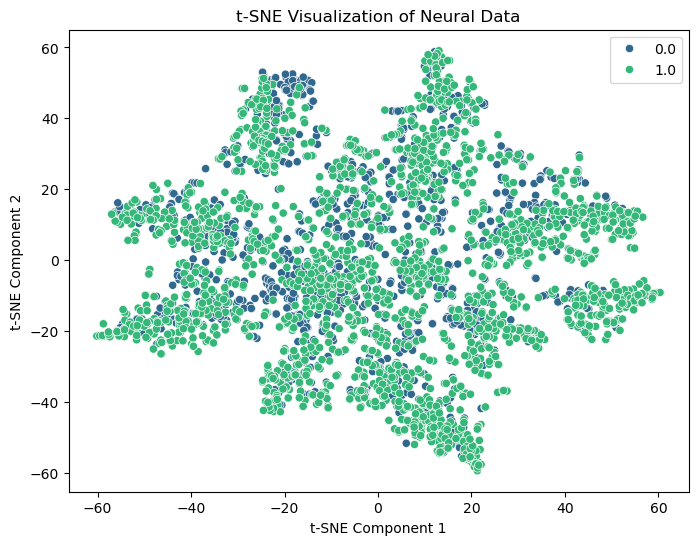

In [34]:
# Plot the t-SNE results y label
plt.figure(figsize=(8, 6))
sb.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette='viridis')
plt.title('t-SNE Visualization of Neural Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
# if y class label = 0: PCx
#    y class label = 1: plCoA
plt.show()

In [35]:
# 90/10 train-test split
X_train, X_test, y_train, y_test = train_test_split(X_tsne, y, test_size=0.1, random_state=42)

# Train a linear SVC on tSNE data
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
accuracy = svc.score(X_test, y_test)
print(f'SVC Accuracy on t-SNE data: {accuracy * 100:.2f}%')

SVC Accuracy on t-SNE data: 61.52%


In [14]:
# Use t-SNE to reduce dimensionality for visualization (10 -> 3)
tsne3 = TSNE(n_components=3, random_state=42)
X_tsne3 = tsne3.fit_transform(X)

X_tsne3.shape

(300, 3)

In [15]:
# 90/10 train-test split
X_train, X_test, y_train, y_test = train_test_split(X_tsne3, y, test_size=0.1, random_state=42)

# Train a linear SVC on tSNE 3D data
svc3 = SVC(kernel='linear')
svc3.fit(X_train, y_train)
accuracy3 = svc3.score(X_test, y_test)
print(f'SVC Accuracy on t-SNE 3D data: {accuracy3 * 100:.2f}%')

SVC Accuracy on t-SNE 3D data: 86.67%


In [50]:
# A loop to try different t-SNE dimensions
for dim in range(5, 8):
    # Use 'exact' method for dimensions >= 4, as Barnes-Hut only supports 2-3D
    if dim >= 4:
        tsne_loop = TSNE(n_components=dim, random_state=42, method='exact')
    else:
        tsne_loop = TSNE(n_components=dim, random_state=42)
    
    X_tsne_loop = tsne_loop.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_tsne_loop, y, test_size=0.1, random_state=42)

    svc_loop = SVC(kernel='linear')
    svc_loop.fit(X_train, y_train)
    accuracy_loop = svc_loop.score(X_test, y_test)
    print(f'SVC Accuracy on t-SNE {dim}D data: {accuracy_loop * 100:.2f}%')

SVC Accuracy on t-SNE 5D data: 61.52%
SVC Accuracy on t-SNE 6D data: 61.52%
SVC Accuracy on t-SNE 7D data: 61.52%


In [17]:
# Try different kernels for SVC on different t-SNE dimensions
kernels = ['linear', 'rbf', 'poly']
for kernel in kernels:
    for dim in range(2, 11):  # Limiting to 5D for computational feasibility
        if dim >= 4:
            tsne_kernel = TSNE(n_components=dim, random_state=42, method='exact')
        else:
            tsne_kernel = TSNE(n_components=dim, random_state=42)
        
        X_tsne_kernel = tsne_kernel.fit_transform(X)

        X_train, X_test, y_train, y_test = train_test_split(X_tsne_kernel, y, test_size=0.1, random_state=42)

        svc_kernel = SVC(kernel=kernel)
        svc_kernel.fit(X_train, y_train)
        accuracy_kernel = svc_kernel.score(X_test, y_test)
        print(f'SVC Accuracy with {kernel} kernel on t-SNE {dim}D data: {accuracy_kernel * 100:.2f}%')




SVC Accuracy with linear kernel on t-SNE 2D data: 83.33%
SVC Accuracy with linear kernel on t-SNE 3D data: 86.67%
SVC Accuracy with linear kernel on t-SNE 4D data: 76.67%
SVC Accuracy with linear kernel on t-SNE 5D data: 70.00%
SVC Accuracy with linear kernel on t-SNE 6D data: 73.33%
SVC Accuracy with linear kernel on t-SNE 7D data: 76.67%
SVC Accuracy with linear kernel on t-SNE 8D data: 56.67%
SVC Accuracy with linear kernel on t-SNE 9D data: 80.00%
SVC Accuracy with linear kernel on t-SNE 10D data: 76.67%
SVC Accuracy with rbf kernel on t-SNE 2D data: 76.67%
SVC Accuracy with rbf kernel on t-SNE 3D data: 73.33%
SVC Accuracy with rbf kernel on t-SNE 4D data: 70.00%
SVC Accuracy with rbf kernel on t-SNE 5D data: 80.00%
SVC Accuracy with rbf kernel on t-SNE 6D data: 76.67%
SVC Accuracy with rbf kernel on t-SNE 7D data: 76.67%
SVC Accuracy with rbf kernel on t-SNE 8D data: 63.33%
SVC Accuracy with rbf kernel on t-SNE 9D data: 73.33%
SVC Accuracy with rbf kernel on t-SNE 10D data: 76.67%

In [57]:
# t-test between the two regions on the mean responses
from scipy.stats import ttest_ind
pcx_means = [np.mean(sess) for sess in X_pcx]
plcoa_means = [np.mean(sess) for sess in X_plcoa]
t_stat, p_value = ttest_ind(pcx_means, plcoa_means)
print(f"T-test between PCx and PLCoA mean responses: t-statistic = {t_stat:.4f}, p-value = {p_value:.4e}')")



T-test between PCx and PLCoA mean responses: t-statistic = -1.0166, p-value = 3.1990e-01')


In [56]:
# t-test between the two regions on the response variance
pcx_vars = [np.var(sess) for sess in X_pcx]
plcoa_vars = [np.var(sess) for sess in X_plcoa]
t_stat_var, p_value_var = ttest_ind(pcx_vars, plcoa_vars)
print(f"T-test between PCx and PLCoA mean responses: t-statistic = {t_stat_var:.4f}, p-value = {p_value_var:.4e}')")


T-test between PCx and PLCoA mean responses: t-statistic = -1.7504, p-value = 9.3377e-02')


In [55]:
# t-test between the two regions on the response fraction per odor
pcx_fractions = []
plcoa_fractions = []
threshold = 0.5  # Define a threshold for significant response
for sess in X_pcx:
    significant_responses = np.sum(sess > threshold)
    total_responses = sess.size
    pcx_fractions.append(significant_responses / total_responses)
for sess in X_plcoa:
    significant_responses = np.sum(sess > threshold)
    total_responses = sess.size
    plcoa_fractions.append(significant_responses / total_responses)
t_stat_frac, p_value_frac = ttest_ind(pcx_fractions, plcoa_fractions)
print(f"T-test between PCx and PLCoA response fractions: t-statistic = {t_stat_frac:.4f}, p-value = {p_value_frac:.4e}')")

T-test between PCx and PLCoA response fractions: t-statistic = 1.0676, p-value = 2.9679e-01')


In [65]:
# Instead of t-SNE, using PCA for dimensionality reduction
from sklearn.decomposition import PCA

for n_components in range(2, 10):
    print(f'\nPCA with {n_components} components:')
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)
    X_pca.shape
    X_pca

    # Train a linear SVC on PCA data
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.1, random_state=42)
    svc_pca = SVC(kernel='linear')
    svc_pca.fit(X_train, y_train)
    accuracy_pca = svc_pca.score(X_test, y_test)
    print(f'\tSVC Accuracy on PCA data: {accuracy_pca * 100:.2f}%')

    # Train a RBF SVC on PCA data
    svc_pca_rbf = SVC(kernel='rbf')
    svc_pca_rbf.fit(X_train, y_train)
    accuracy_pca_rbf = svc_pca_rbf.score(X_test, y_test)
    print(f'\tSVC Accuracy on PCA data with RBF kernel: {accuracy_pca_rbf * 100:.2f}%')


PCA with 2 components:
	SVC Accuracy on PCA data: 61.52%
	SVC Accuracy on PCA data with RBF kernel: 61.82%

PCA with 3 components:
	SVC Accuracy on PCA data: 61.52%
	SVC Accuracy on PCA data with RBF kernel: 63.33%

PCA with 4 components:
	SVC Accuracy on PCA data: 61.52%
	SVC Accuracy on PCA data with RBF kernel: 63.94%

PCA with 5 components:
	SVC Accuracy on PCA data: 61.52%
	SVC Accuracy on PCA data with RBF kernel: 64.55%

PCA with 6 components:
	SVC Accuracy on PCA data: 61.52%
	SVC Accuracy on PCA data with RBF kernel: 66.97%

PCA with 7 components:
	SVC Accuracy on PCA data: 61.52%
	SVC Accuracy on PCA data with RBF kernel: 67.58%

PCA with 8 components:
	SVC Accuracy on PCA data: 61.52%
	SVC Accuracy on PCA data with RBF kernel: 67.27%

PCA with 9 components:
	SVC Accuracy on PCA data: 61.52%
	SVC Accuracy on PCA data with RBF kernel: 69.09%


In [1]:
import h5py
natmix_data = h5py.File ('region_sessions_natMix.mat')

In [6]:
list(natmix_data.keys())

['#refs#', 'x_pcx', 'x_plcoa']

In [9]:
# create 2 array with all sessions from each region
X_pcx = []
X_plcoa = []
for sess in natmix_data['x_pcx']:
    X_pcx.append(np.array(natmix_data[sess[0]]))
for sess in natmix_data['x_plcoa']:
    X_plcoa.append(np.array(natmix_data[sess[0]]))

In [10]:
len(X_pcx), len(X_plcoa)

(11, 11)

In [ ]:
# Looking at the shapes of the sessions for fun (10 trials x 13 nat mix odors X N neurons)
for i in range(len(X_pcx)):
    print(f"Session {i} - PCX shape: {X_pcx[i].shape}")
          
for i in range(len(X_plcoa)):   
    print(f"Session {i} - PLCoA shape: {X_plcoa[i].shape}")
    

Session 0 - PCX shape: (17, 130)
Session 1 - PCX shape: (16, 130)
Session 2 - PCX shape: (17, 130)
Session 3 - PCX shape: (30, 130)
Session 4 - PCX shape: (23, 130)
Session 5 - PCX shape: (38, 130)
Session 6 - PCX shape: (23, 130)
Session 7 - PCX shape: (18, 130)
Session 8 - PCX shape: (22, 130)
Session 9 - PCX shape: (28, 130)
Session 10 - PCX shape: (46, 130)
Session 0 - PLCoA shape: (33, 130)
Session 1 - PLCoA shape: (22, 130)
Session 2 - PLCoA shape: (9, 130)
Session 3 - PLCoA shape: (35, 130)
Session 4 - PLCoA shape: (43, 130)
Session 5 - PLCoA shape: (31, 130)
Session 6 - PLCoA shape: (34, 130)
Session 7 - PLCoA shape: (32, 130)
Session 8 - PLCoA shape: (30, 130)
Session 9 - PLCoA shape: (19, 130)
Session 10 - PLCoA shape: (25, 130)


In [12]:
X , y = build_dataset(X_pcx,X_plcoa, 10)
X.shape , y.shape

((2730, 10), (2730,))

In [13]:
from sklearn.model_selection import train_test_split
# On original data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

svc_orig = SVC(kernel='linear')
svc_orig.fit(X_train, y_train)
accuracy_orig = svc_orig.score(X_test, y_test)
print(f'SVC Accuracy on Original data: {accuracy_orig * 100:.2f}%')

SVC Accuracy on Original data: 62.27%


In [14]:
svc_orig = SVC(kernel='rbf' )
svc_orig.fit(X_train, y_train)
accuracy_orig = svc_orig.score(X_test, y_test)
print(f'SVC Accuracy on Original data: {accuracy_orig * 100:.2f}%')

SVC Accuracy on Original data: 69.60%
